-------------Section 2: Google+ Network---------------------

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !pip install igraph
# !pip install python-igraph==0.10.4
# !pip uninstall python-igraph==0.10.4 -y
!pip install python-igraph==0.9.6
!pip install cairocffi

In [35]:
import os
import igraph as ig
import tarfile

import matplotlib.pyplot as plt

QUESTION (18): how many personal networks?

There are 57 personal networks with more than 2 circles.

In [ ]:
# Question 18 - how many personal networks

# Extract gplus
archive_path = "/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/gplus.tar.gz"
with tarfile.open(archive_path, "r:gz") as archive:
    archive.extractall("/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/temp")

In [13]:
folder_path = "/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/temp/gplus/"
user_ids = []
graphs = []
focus_users = ["109327480479767108490", "115625564993990145546", "101373961279443806744"]
focus_graphs = []


# Go through files
for file_name in os.listdir(folder_path):
    if file_name.endswith(".circles"):
        with open(os.path.join(folder_path, file_name), "r") as f:
            user_id = file_name[:-8]
            
            # count the circles
            count=0
            for line in f:
                count+=1
            
            # add user
            if count > 2:
                user_ids.append(user_id)
                
                # Go through edge files
                edges = []
                vertices = []
                with open(os.path.join(folder_path, user_id + ".edges"), "r") as f:
                    for line in f:
                        source, target = line.strip().split(" ")
                        if source not in vertices:
                            vertices.append(source)
                        if target not in vertices:
                            vertices.append(target)
                        edges.append((source, target))
                        
                    # create the graph
                    g = ig.Graph(directed=True)
                    g.add_vertices(vertices)
                    g.add_edges(edges)
                    graphs.append(g)
                    if user_id in focus_users:
                      focus_graphs.append(g)

print(len(graphs))
print(len(user_ids))

57
57


QUESTION 19

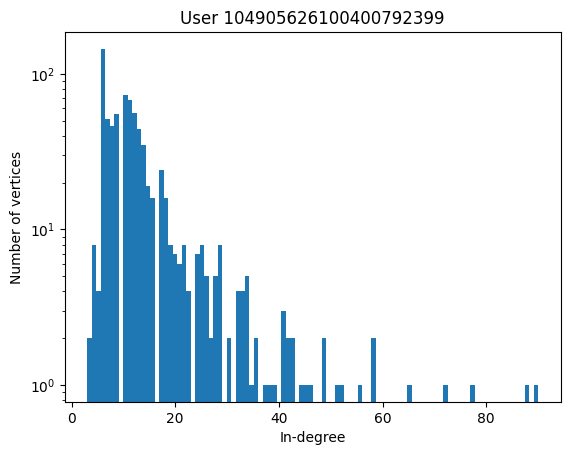

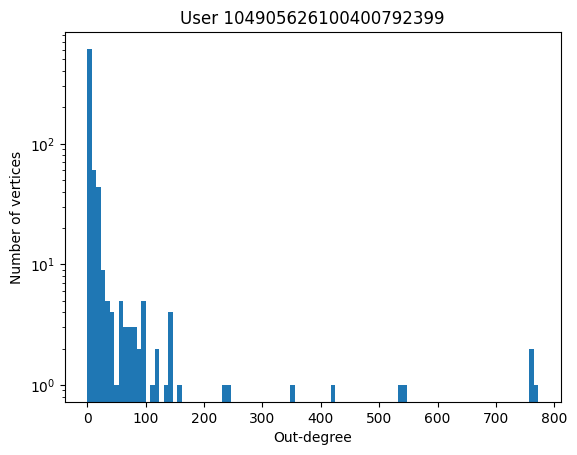

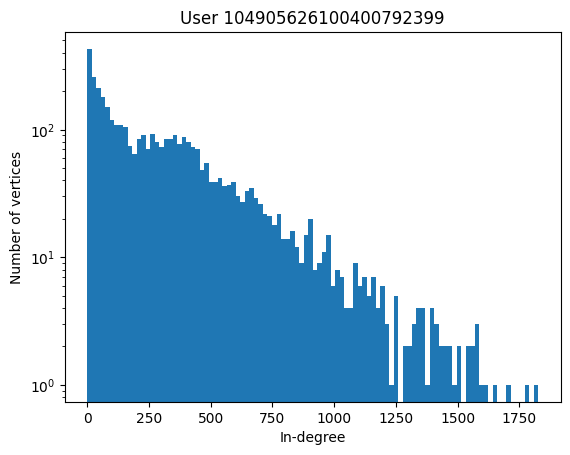

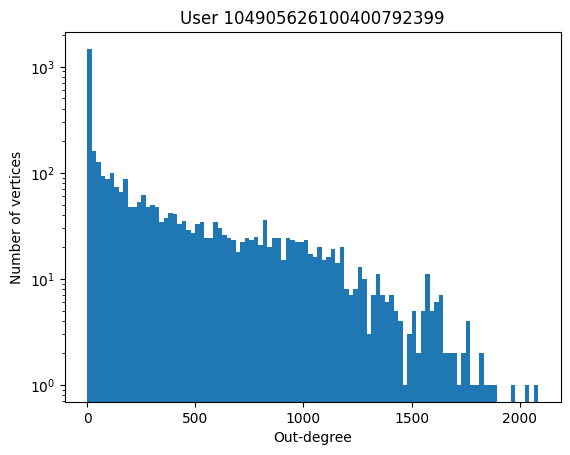

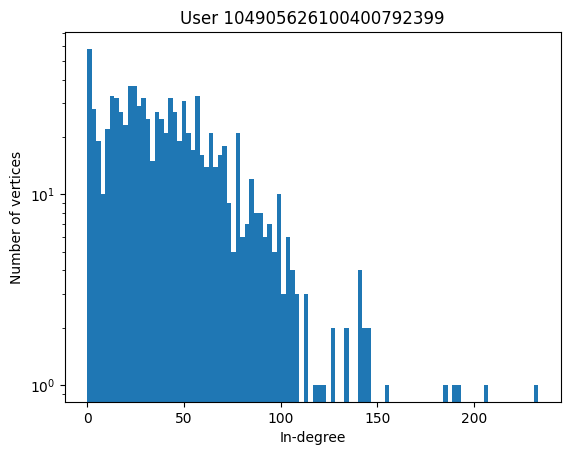

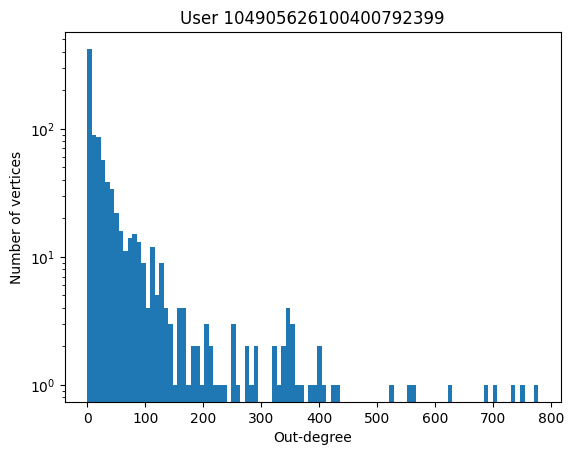

In [43]:
i=0
for user in focus_users:
    in_degrees = focus_graphs[i].indegree()
    out_degrees = focus_graphs[i].outdegree()
    # Plot the in-degree distribution
    plt.hist(in_degrees, bins=100, log=True)
    plt.title("User {}".format(user_id))
    plt.xlabel("In-degree")
    plt.ylabel("Number of vertices")
    plt.show()
    # Plot the out-degree distribution
    plt.hist(out_degrees, bins=100, log=True)
    plt.title("User {}".format(user_id))
    plt.xlabel("Out-degree")
    plt.ylabel("Number of vertices")
    plt.show()
    i+=1